<a href="https://colab.research.google.com/github/Sobhan-Gh/Graph-state-functions/blob/main/Copy_of_Convert_Stabilizer_to_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Row reduction function

In [ ]:
import numpy as np
import networkx as nx

Xmatrix=np.array([[1,1,1,1],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
Zmatrix=np.array([[0,0,0,0],[1,1,0,0],[0,1,1,0],[0,0,1,1]])
n,m=np.shape(Xmatrix)
pivot=[0,0]

In [ ]:
#Elementary row operations (binary)

def RowSwap(X,i,j):
  X[[i,j]]=X[[j,i]]
  return X

def Add_Rows(X,i,j):
  X[j]=(X[i]+X[j])%2
  return X

#column swap between X and Z
def Hadamard(X,Z,i):
  temp1=list(Z[:,i])
  temp2=list(X[:,i])
  Z[:,i]=temp2
  X[:,i]=temp1
  return X,Z

#returns the row reduced matrix X, the transformed matrix Z and the (rank-1) of the X matrix
def RowRed(X,Z,pivot):
  n,m=np.shape(X)
  rank=0
  if pivot[1]==(m-1):
    return X,Z,pivot[0]
  else:
    #list of rows with value 1 under the pivot element
    the_ones=[]
    for a in range(pivot[0],n):
      if X[a,pivot[1]]==1:
        the_ones.append(a)
    #check if the column below is empty to skip it
    if not the_ones:
      pivot=[pivot[0],pivot[1]+1]
      X,Z,rank=RowRed(X,Z,pivot)
    else:
      X=RowSwap(X,the_ones[0],pivot[0])
      Z=RowSwap(Z,the_ones[0],pivot[0])
      the_ones.remove(the_ones[0])
      for b in the_ones:
        X=Add_Rows(X,pivot[0],b)
        Z=Add_Rows(Z,pivot[0],b)
      pivot=[pivot[0]+1,pivot[1]+1]
      X,Z,rank=RowRed(X,Z,pivot)
    return X,Z,pivot[0]

#the overall function getting X and Z matrices as input and giving out the euqivalent graph. Initialization of X,Z, and pivot is needed. 
def graph_finder(Xmatrix,Zmatrix,pivot):
  j=[]
  Xmatrix,Zmatrix,rank=RowRed(Xmatrix,Zmatrix,pivot)
  if Xmatrix[rank][np.shape(Xmatrix)[1]-1]==0:
    rank=rank-1
  i=[*range(rank+1,n)] 
  print("Hadamard on these qubits:",i)
  Xmatrix,Zmatrix=Hadamard(Xmatrix,Zmatrix,i)
  assert ((np.linalg.det(Xmatrix))%2 !=0),"Stabilizer generators are not independent!" 
  Xinverse=np.linalg.inv(Xmatrix)
  Xmatrix,Zmatrix=np.matmul(Xinverse,Xmatrix)%2,np.matmul(Xinverse,Zmatrix)%2
  Zdiag=list(np.diag(Zmatrix))
  counter=0
  j=[]
  for i in Zdiag:
    if i==1:
      j.append(counter)
    counter=counter+1
  counter=0
  print("non-zeroes in diag Z",j)
  for a in j:
    Zmatrix[a][a]=0
  Zdiag=list(np.diag(Zmatrix))
  counter=0
  j=[]
  for i in Zdiag:
    if i==1:
      j.append(counter)
    counter=counter+1
  counter=0
  assert (Xmatrix.shape[0] == Xmatrix.shape[1]) and (Xmatrix == np.eye(Xmatrix.shape[0])).all(),"something is wrong!"
  assert (not j),"Z diag is not zero yet!"
  print("Final X matrix","\n",Xmatrix,"\n")
  print("Final Z matrix","\n",Zmatrix,"\n")
  G = nx.from_numpy_matrix(Zmatrix)
  return nx.draw(G)

Testing the function for random input

In [ ]:
#random test of the graph finder
import random
#choose range for the number of qubits
n=(random.randint(4, 5))
pivot=[0,0]
#random stabilizer state 
Zmatrix=np.random.randint(2, size=(n, n))
Xmatrix=np.random.randint(2, size=(n, n))
print("Initial X \n",Xmatrix,"\n","Initial Z \n",Zmatrix)
#find graph
graph_finder(Xmatrix,Zmatrix,pivot)

Algorithm explained

In [ ]:
Xmatrix,Zmatrix,rank=RowRed(Xmatrix,Zmatrix,pivot)
#adjusting the rank of the matrix if the last pivot is zero
if Xmatrix[rank][np.shape(Xmatrix)[1]-1]==0:
  rank=rank-1
#the list of the rows that are more than rank in X matrix
i=[*range(rank+1,n)]
#apply Hadamard on qubits k+1 (rank) to m 
Xmatrix,Zmatrix=Hadamard(Xmatrix,Zmatrix,i)

# X is now invertible   

In [ ]:
print(Xmatrix)
print(Zmatrix)
Xinverse=np.linalg.inv(Xmatrix)%2
Xmatrix,Zmatrix=np.matmul(Xinverse,Xmatrix)%2,np.matmul(Xinverse,Zmatrix)%2
#final graph form (in the initial group does not have a Pauli Y elements, if yes more operations are needed)
print(Xmatrix)
print(Zmatrix)

In [ ]:
#Making Z matrix diag-less by applying P H P^(-1) Cliffords to each non-zero qubit

Zdiag=list(np.diag(Zmatrix))
counter=0
j=[]
for i in Zdiag:
  if i==1:
    j.append(counter)
  counter=counter+1
counter=0
print(j)
#make these diag element zero in Z matrix
for a in j:
  Zmatrix[a][a]=0
Zdiag=list(np.diag(Zmatrix))
counter=0
j=[]
for i in Zdiag:
  if i==1:
    j.append(counter)
  counter=counter+1
counter=0
assert (Xmatrix.shape[0] == Xmatrix.shape[1]) and (Xmatrix == np.eye(Xmatrix.shape[0])).all() and (not j)

In [ ]:
G = nx.from_numpy_matrix(Zmatrix)
nx.draw(G)

non-zeroes in diag Z []
Final X matrix 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 

Final Z matrix 
 [[0. 1. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]] 



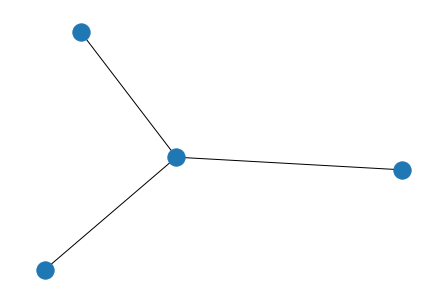

In [ ]:
graph_finder(Xmatrix,Zmatrix,pivot)